In [61]:
# import numpy as np
import matplotlib.pyplot as plt
D = np.random.randn(1000, 500) # height, length
hidden_layer_sizes = [500] *10
nonlinearities = ['tanh']*len(hidden_layer_sizes)

In [62]:
hidden_layer_sizes

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500]

In [63]:
nonlinearities

['tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh',
 'tanh']

In [64]:
for i in range(10):
    print(i)
# you can see that it is from 0 to n-1

0
1
2
3
4
5
6
7
8
9


In [65]:
a = np.random.randn(10, 5)
print(a)
print(a.shape[1]) # 先竖后横
print(np.dot(a.shape[1],500)) # dot product


[[  1.59803581e-01   1.08867180e+00   4.18726074e-01   1.09191035e+00
    5.47017966e-02]
 [  9.92815227e-01   8.69107511e-01  -2.52014469e-01  -1.77406697e-01
   -3.82550738e-01]
 [ -2.26987995e-01   2.68003563e-01  -6.59435123e-01  -1.48330369e+00
   -2.60628206e-01]
 [  1.20625165e-01  -1.38164913e+00  -9.08087576e-01  -8.46866695e-01
    6.71739834e-01]
 [  9.47456135e-02   1.71248039e-02   5.10372973e-01   6.45615602e-01
    1.28608403e+00]
 [  1.39227723e+00  -4.12493403e-01   1.16920346e+00  -5.66031255e-01
   -3.56558112e-01]
 [ -5.18093488e-01   2.34294741e+00  -3.04677453e-01  -1.22369491e-01
   -7.99337791e-04]
 [  4.24709344e-01   7.34584944e-01   2.91863122e-01   1.08396928e+00
   -1.01302418e+00]
 [  1.22527304e-02   9.79550790e-01  -1.97656017e+00  -9.37517203e-02
   -1.46309882e+00]
 [  5.10206730e-01  -9.27959043e-01  -8.81543519e-01   5.66946916e-02
   -5.64902464e-01]]
5
2500


In [66]:
act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}

In [67]:
Hs = {}
for i in range(len(hidden_layer_sizes)):
    if i == 0:
        X = D  
    else:
        X = Hs[i-1]
    fan_in = X.shape[1] # 500
    fan_out = hidden_layer_sizes[i] # 500
    
    # W = np.random.randn(fan_in, fan_out) * 0.05 
    W = np.random.randn(fan_in, fan_out)/np.sqrt(fan_in)
    
    h = np.dot(X,W) # dot product
    H = act[nonlinearities[i]](h) # see 'act''s definition seems like implementing the function
    Hs[i] = H
    print(i, fan_in, fan_out,'\n', np.shape(X), np.shape(W), np.shape(h))

0 500 500 
 (1000, 500) (500, 500) (1000, 500)
1 500 500 
 (1000, 500) (500, 500) (1000, 500)
2 500 500 
 (1000, 500) (500, 500) (1000, 500)
3 500 500 
 (1000, 500) (500, 500) (1000, 500)
4 500 500 
 (1000, 500) (500, 500) (1000, 500)
5 500 500 
 (1000, 500) (500, 500) (1000, 500)
6 500 500 
 (1000, 500) (500, 500) (1000, 500)
7 500 500 
 (1000, 500) (500, 500) (1000, 500)
8 500 500 
 (1000, 500) (500, 500) (1000, 500)
9 500 500 
 (1000, 500) (500, 500) (1000, 500)


In [68]:
np.shape(Hs[1])

(1000, 500)

In [69]:
for i, H in Hs.items():
    print(i, np.shape(H))
    

0 (1000, 500)
1 (1000, 500)
2 (1000, 500)
3 (1000, 500)
4 (1000, 500)
5 (1000, 500)
6 (1000, 500)
7 (1000, 500)
8 (1000, 500)
9 (1000, 500)


In [70]:
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()] # I just change the iteriterms to iterms
layer_stds = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

input layer had mean -0.002062 and std 0.999366
hidden layer 1 had mean 0.000069 and std 0.628475
hidden layer 2 had mean 0.000705 and std 0.486252
hidden layer 3 had mean -0.000096 and std 0.409390
hidden layer 4 had mean -0.000223 and std 0.358079
hidden layer 5 had mean 0.000309 and std 0.323024
hidden layer 6 had mean -0.000407 and std 0.295632
hidden layer 7 had mean 0.000149 and std 0.271727
hidden layer 8 had mean 0.000089 and std 0.253270
hidden layer 9 had mean -0.000491 and std 0.238128
hidden layer 10 had mean -0.000003 and std 0.224406


In [71]:
list(Hs.keys())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [72]:
layer_means

[6.9316197526680828e-05,
 0.00070544578416406058,
 -9.5521085427141986e-05,
 -0.00022343732354940954,
 0.00030897388191307847,
 -0.00040688878392717166,
 0.00014866498818617363,
 8.9335728111872943e-05,
 -0.00049143381645698275,
 -2.6051243391910217e-06]

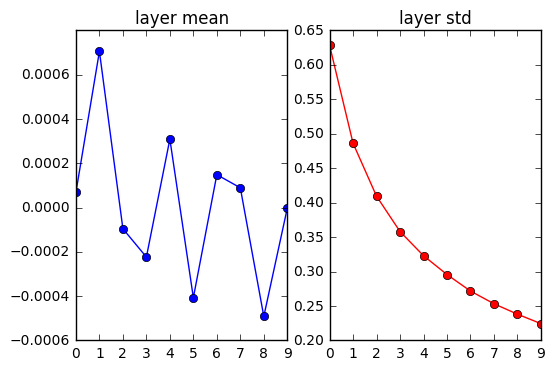

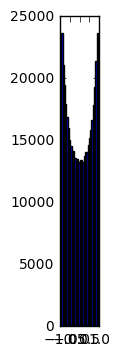

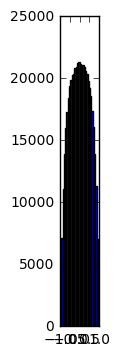

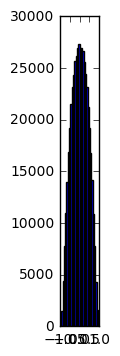

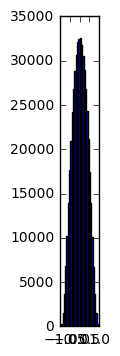

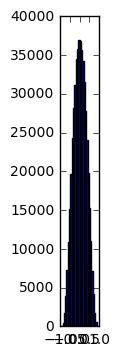

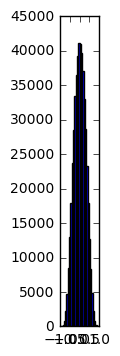

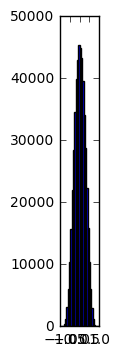

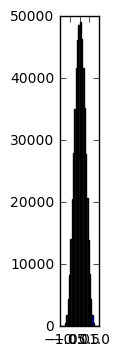

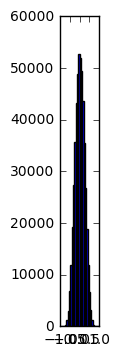

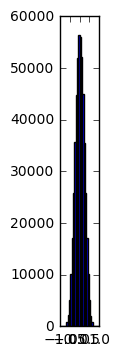

In [73]:
# plot the means and stds
plt.figure() 
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-') # why it becomes okay after I change Hs.keys() to list(Hs.keys())
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()

# plot the raw distributions
plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))
    plt.show()

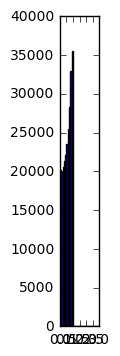

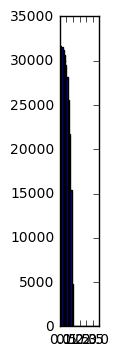

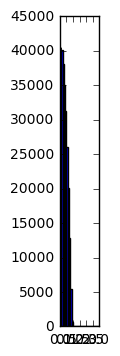

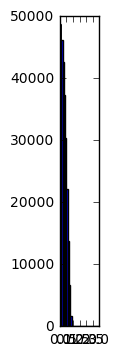

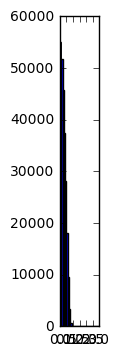

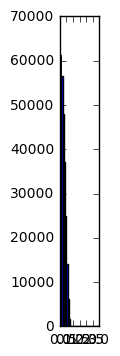

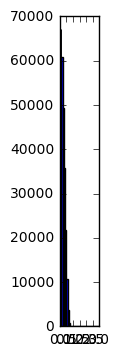

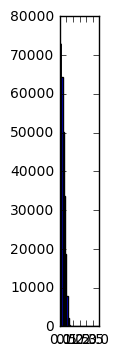

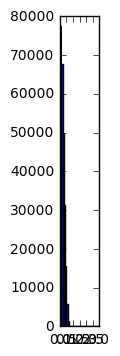

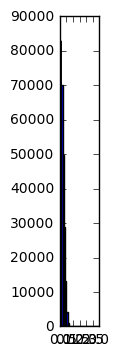

In [74]:
plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(0,3))
    plt.show()

In [75]:
len(hidden_layer_sizes)

10

In [45]:
a = np.array([[1,2],[3,4]])
a.ravel()

array([1, 2, 3, 4])

In [46]:
H.ravel() # Return a contiguous flattened array. 感觉像把array中的元素取出来

array([-0.09646362,  0.37062091, -0.12979683, ..., -0.17293082,
        0.07155088,  0.16285758])

In [47]:
H

array([[-0.09646362,  0.37062091, -0.12979683, ...,  0.1441294 ,
         0.31710993, -0.03001919],
       [ 0.01771097,  0.21775344,  0.11873215, ...,  0.14632579,
        -0.18083956,  0.10455332],
       [ 0.04346859, -0.44198494, -0.15396851, ...,  0.07147109,
        -0.53982808, -0.36786381],
       ..., 
       [ 0.2218601 ,  0.03658283, -0.14590417, ...,  0.23777343,
        -0.11862488,  0.08115596],
       [ 0.14491887, -0.13852592,  0.05375878, ...,  0.33995295,
         0.12247133,  0.09851487],
       [-0.09944034, -0.0084395 , -0.07350693, ..., -0.17293082,
         0.07155088,  0.16285758]])

In [48]:
np.sqrt(1)

1.0

In [57]:
def ini_two_layer_model(input_size, hidden_size, output_size):
    model = {}
    model['W1'] = 0.0001*np.random.randn(input_size, hidden_size)
    model['b1'] = np.zeros(hidden_size)
    model['W2'] = 0.0001*np.random.randn(hidden_size, output_size)
    return model

In [59]:
midel = ini_two_layer_model(32*32*3, 50, 10)
loss,grad = two_layer_net(X_train, model, y_train, 0.0)
print(loss)

NameError: name 'two_layer_net' is not defined

In [60]:
trainer.train

NameError: name 'trainer' is not defined